In [1]:
import numpy as np
import pandas as pd
import datetime as datetime

import re
from itertools import combinations
from math import radians, sin, cos, asin, sqrt

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from datetime import datetime
import os

In [2]:
#sns.set(style="darkgrid")
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

## 1. Осмотр данных

In [3]:
flights = pd.read_csv(os.getcwd() + '/data/query_result_final.csv')
flights

,flight_id,flight_no,time_departure,city,airport,flight_time,delay_time,d_coordinates,a_coordinates,airplane,count_seats,count_tickets,total_amount,fare_conditions,seat_no,amount
0,136119,PG0252,2017-01-03T10:05:00Z,Москва,SVO,100.0,1.0,37.3473014831539984:45.002101898192997,37.4146000000000001:55.9725990000000024,Boeing 737-300,130,113,1653000.0,Economy,10C,12200.0
1,136119,PG0252,2017-01-03T10:05:00Z,Москва,SVO,100.0,1.0,37.3473014831539984:45.002101898192997,37.4146000000000001:55.9725990000000024,Boeing 737-300,130,113,1653000.0,Economy,10D,12200.0
2,136119,PG0252,2017-01-03T10:05:00Z,Москва,SVO,100.0,1.0,37.3473014831539984:45.002101898192997,37.4146000000000001:55.9725990000000024,Boeing 737-300,130,113,1653000.0,Economy,10E,12200.0
3,136119,PG0252,2017-01-03T10:05:00Z,Москва,SVO,100.0,1.0,37.3473014831539984:45.002101898192997,37.4146000000000001:55.9725990000000024,Boeing 737-300,130,113,1653000.0,Economy,11A,13400.0
4,136119,PG0252,2017-01-03T10:05:00Z,Москва,SVO,100.0,1.0,37.3473014831539984:45.002101898192997,37.4146000000000001:55.9725990000000024,Boeing 737-300,130,113,1653000.0,Economy,11B,13400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,136956,PG0480,2017-02-04T09:25:00Z,Белгород,EGO,50.0,0.0,37.3473014831539984:45.002101898192997,36.5900993347167969:50.643798828125,Sukhoi Superjet-100,97,96,746400.0,Business,2D,18900.0
12000,136956,PG0480,2017-02-04T09:25:00Z,Белгород,EGO,50.0,0.0,37.3473014831539984:45.002101898192997,36.5900993347167969:50.643798828125,Sukhoi Superjet-100,97,96,746400.0,Business,2F,18900.0
12001,136956,PG0480,2017-02-04T09:25:00Z,Белгород,EGO,50.0,0.0,37.3473014831539984:45.002101898192997,36.5900993347167969:50.643798828125,Sukhoi Superjet-100,97,96,746400.0,Business,3A,18900.0
12002,136956,PG0480,2017-02-04T09:25:00Z,Белгород,EGO,50.0,0.0,37.3473014831539984:45.002101898192997,36.5900993347167969:50.643798828125,Sukhoi Superjet-100,97,96,746400.0,Business,3C,18900.0


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12004 entries, 0 to 12003
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_id        12004 non-null  int64  
 1   flight_no        12004 non-null  object 
 2   time_departure   12004 non-null  object 
 3   city             12004 non-null  object 
 4   airport          12004 non-null  object 
 5   flight_time      12004 non-null  float64
 6   delay_time       12004 non-null  float64
 7   d_coordinates    12004 non-null  object 
 8   a_coordinates    12004 non-null  object 
 9   airplane         12004 non-null  object 
 10  count_seats      12004 non-null  int64  
 11  count_tickets    12004 non-null  int64  
 12  total_amount     11995 non-null  float64
 13  fare_conditions  11995 non-null  object 
 14  seat_no          11995 non-null  object 
 15  amount           11995 non-null  float64
dtypes: float64(4), int64(3), object(9)
memory usage: 1.5+ MB


In [5]:
flights.columns

Index(['flight_id', 'flight_no', 'time_departure', 'city', 'airport',
       'flight_time', 'delay_time', 'd_coordinates', 'a_coordinates',
       'airplane', 'count_seats', 'count_tickets', 'total_amount',
       'fare_conditions', 'seat_no', 'amount'],
      dtype='object')

In [6]:
pd.DataFrame(flights.isna().sum(), columns=['NaN']).T

,flight_id,flight_no,time_departure,city,airport,flight_time,delay_time,d_coordinates,a_coordinates,airplane,count_seats,count_tickets,total_amount,fare_conditions,seat_no,amount
NaN,0,0,0,0,0,0,0,0,0,0,0,0,9,9,9,9


In [7]:
flights.time_departure = pd.to_datetime(flights.time_departure, format= '%Y-%m-%dT%H:%M:%SZ')

## 2. Первичный анализ данных в столбцах

In [8]:
def _look(df, col):

    print('Столбец', col)
    fig, ax = plt.subplots()
    if df.loc[:, col].dtype == np.dtype('O'):
        sns.countplot(df.loc[:, col], ax=ax)
    else:
        df.loc[:, col].hist(ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('count')
    plt.show()

In [9]:
def display_df(df):
    for col in df.columns:
        if col not in ['flight_id','time_departure','d_coordinates', 'a_coordinates', 'seat_no']: 
            _look(df,col)

Столбец flight_no


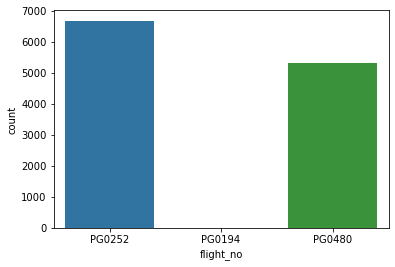

Столбец city


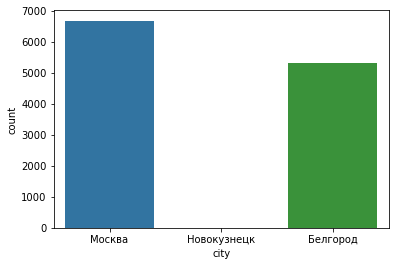

Столбец airport


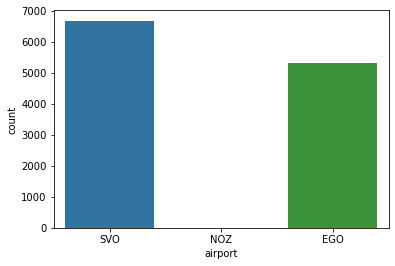

Столбец flight_time


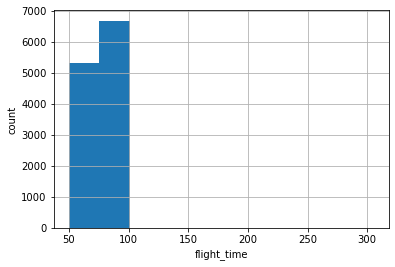

Столбец delay_time


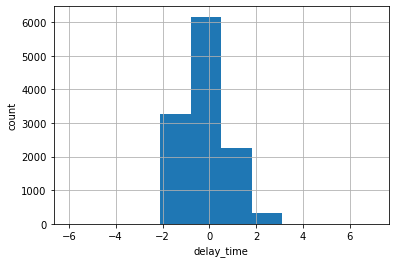

Столбец airplane


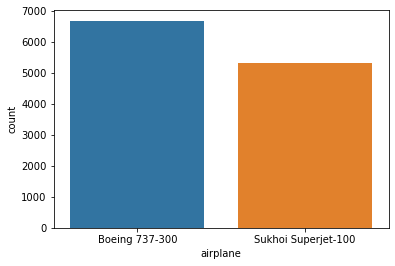

Столбец count_seats


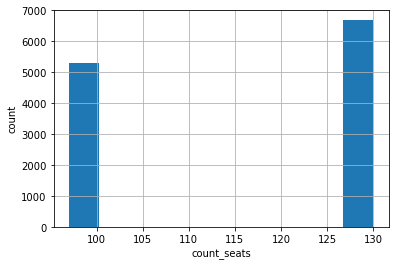

Столбец count_tickets


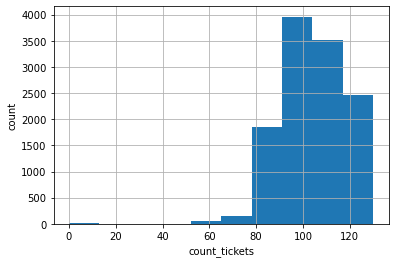

Столбец total_amount


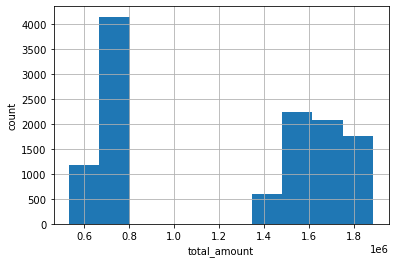

Столбец fare_conditions


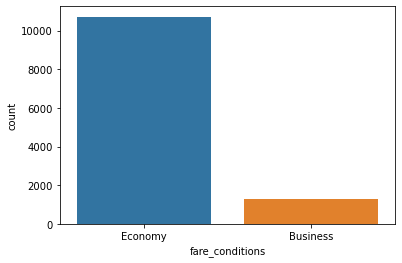

Столбец amount


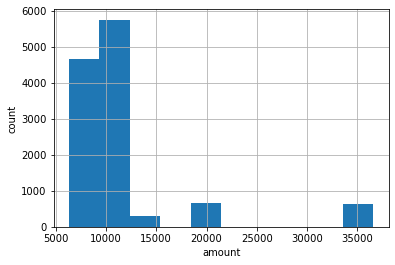

In [10]:
display_df(flights)

In [11]:
flights.dropna(inplace = True)

In [12]:
flights['uplift_ratio'] = flights['count_tickets'] * 100 / flights['count_seats']
flights = flights.round({'uplift_ratio': 1})

In [13]:
# вычисление дистанции между аэропортами по их географическим координатам

def get_distance(row):
    
    _lng_1, _lat_1 = row.a_coordinates.split(':')
    _lng_2, _lat_2 = row.d_coordinates.split(':')
    lon1, lat1, lon2, lat2 = map(radians, [float(_lng_1), float(_lat_1), float(_lng_2), float(_lat_2)])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371
    row.distance = c * earth_radius
    return row

In [14]:
flights['distance'] = 0
flights = flights.apply(get_distance, axis = 1)
flights = flights.round({'distance': 0})

In [15]:
# Стоимость авиакеросина в 2017 году 43400 руб. за тонну
# Часовой расход топлива по видам бортов
# Boeing 737-300 - 2.6 тн
# Cухой Cуперджет 100 - 1.75 тн

def get_fuel_cost(row):
    
    if row.airplane == 'Boeing 737-30':
        fuel_rate = 2.6
    elif row.airplane == 'Sukhoi Superjet-100':
        fuel_rate = 1.75
    else:
        fuel_rate = 2.2
    row.fuel_cost = 43400 * fuel_rate * row.flight_time / 60   
    row.operation_profit = row.total_amount - row.fuel_cost 
    row.profit_flight_time = row.operation_profit / (row.flight_time / 60)
    return row

In [16]:
flights['fuel_cost'] = 0
flights['operation_profit'] = 0
flights['profit_flight_time'] = 0

flights = flights.apply(get_fuel_cost, axis = 1)
flights = flights.round({'fuel_cost': 0, 'operation_profit': 0, 'profit_flight_time': 0})

In [17]:
flights_spec = flights[['flight_no', 'city', 'airport', 'flight_time', 'delay_time',
                   'airplane', 'uplift_ratio', 'total_amount', 'fuel_cost', 'operation_profit', 'profit_flight_time']]
flights_spec.drop_duplicates(inplace = True)
flights_spec.reset_index(drop = True, inplace=True)

In [18]:
flights_spec

,flight_no,city,airport,flight_time,delay_time,airplane,uplift_ratio,total_amount,fuel_cost,operation_profit,profit_flight_time
0,PG0252,Москва,SVO,100.0,1.0,Boeing 737-300,86.9,1653000.0,159133.0,1493867.0,896320.0
1,PG0252,Москва,SVO,100.0,-1.0,Boeing 737-300,83.8,1605400.0,159133.0,1446267.0,867760.0
2,PG0252,Москва,SVO,100.0,0.0,Boeing 737-300,74.6,1431000.0,159133.0,1271867.0,763120.0
3,PG0252,Москва,SVO,100.0,-1.0,Boeing 737-300,82.3,1556600.0,159133.0,1397467.0,838480.0
4,PG0252,Москва,SVO,100.0,-1.0,Boeing 737-300,95.4,1812800.0,159133.0,1653667.0,992200.0
...,...,...,...,...,...,...,...,...,...,...,...
89,PG0480,Белгород,EGO,50.0,1.0,Sukhoi Superjet-100,99.0,759000.0,63292.0,695708.0,834850.0
90,PG0480,Белгород,EGO,50.0,0.0,Sukhoi Superjet-100,78.4,607800.0,63292.0,544508.0,653410.0
91,PG0480,Белгород,EGO,50.0,0.0,Sukhoi Superjet-100,84.5,632400.0,63292.0,569108.0,682930.0
92,PG0480,Белгород,EGO,50.0,0.0,Sukhoi Superjet-100,83.5,626100.0,63292.0,562808.0,675370.0


Столбец flight_no


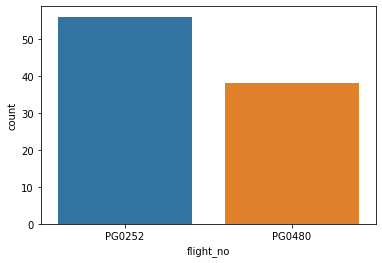

Столбец city


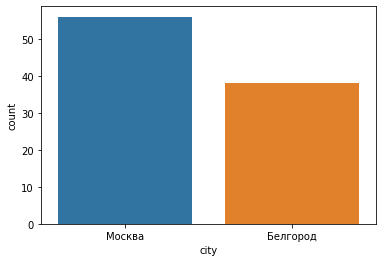

Столбец airport


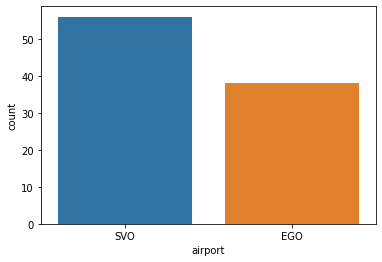

Столбец flight_time


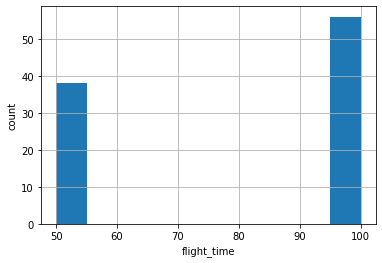

Столбец delay_time


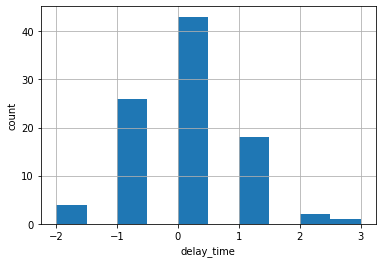

Столбец airplane


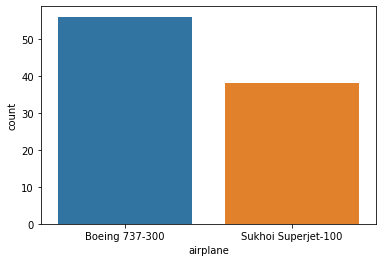

Столбец uplift_ratio


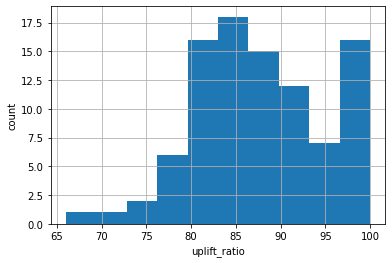

Столбец total_amount


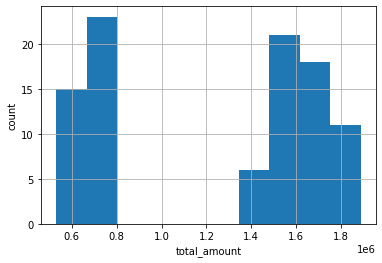

Столбец fuel_cost


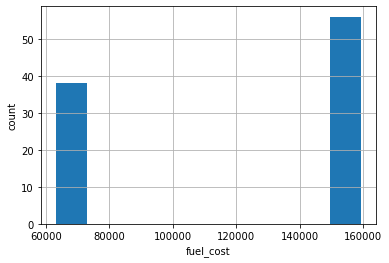

Столбец operation_profit


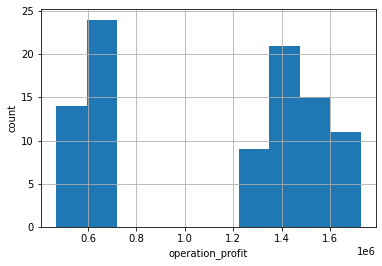

Столбец profit_flight_time


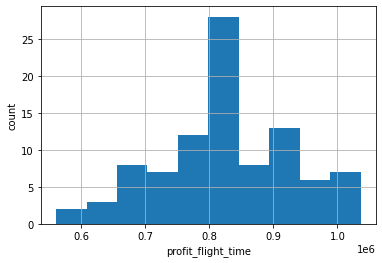

In [19]:
display_df(flights_spec)

In [20]:
def show_bar(df):
    for col in df.columns:
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 0.8, 1])
        axes.grid()
        axes.bar(x = df.index, height = df[col], 
                width = 0.5, align = 'center')
        plt.title(col)
        plt.show()

In [26]:
df = flights_spec[['city', 'uplift_ratio', 'total_amount', 'fuel_cost', 'operation_profit', 'profit_flight_time']].groupby(['city']).mean().round(2)
display(df)

,uplift_ratio,total_amount,fuel_cost,operation_profit,profit_flight_time
city,,,,,
Белгород,89.39,682271.05,63292.0,618979.05,742775.26
Москва,86.47,1631953.57,159133.0,1472820.57,883692.14


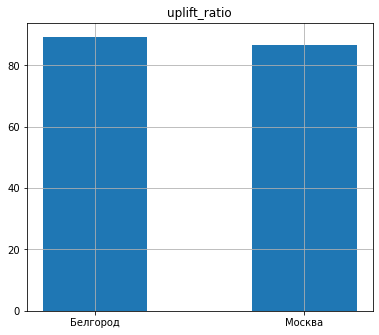

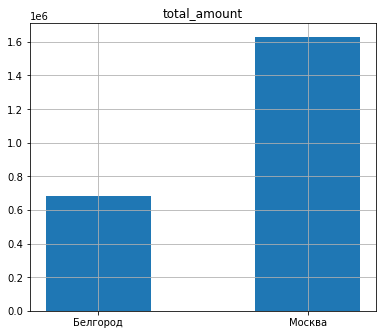

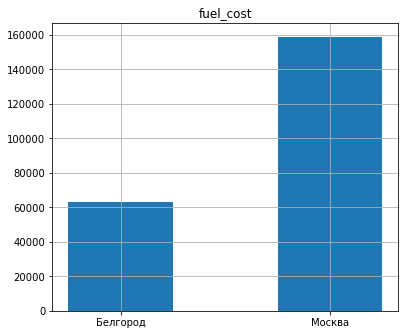

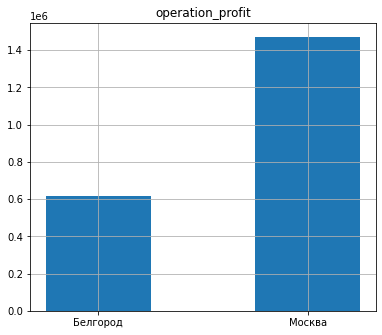

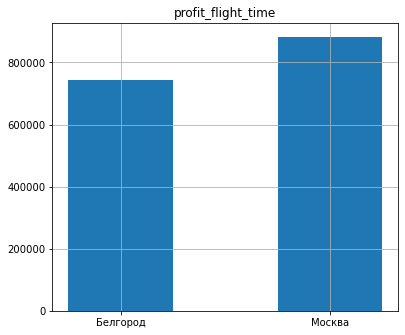

In [27]:
show_bar(df)

In [23]:
df = flights_spec[['city', 'total_amount', 'fuel_cost', 'operation_profit']].groupby(['city']).sum().round(2)
display(df)

,total_amount,fuel_cost,operation_profit
city,,,
Белгород,25926300.0,2405096.0,23521204.0
Москва,91389400.0,8911448.0,82477952.0


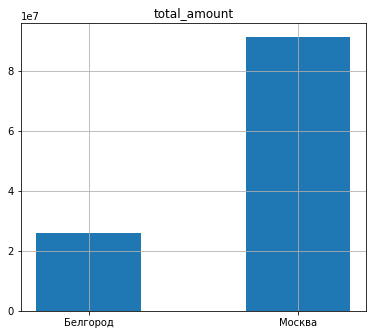

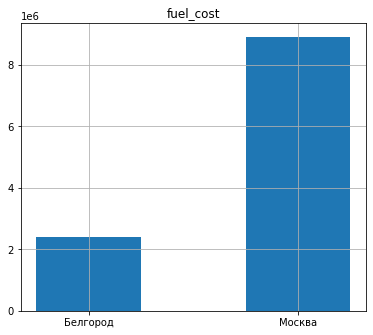

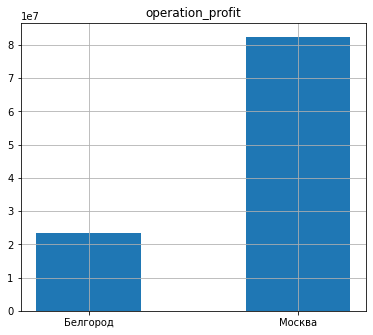

In [24]:
show_bar(df)

## 5. Выводы

* Все полеты, за исключением рейса в Новокузнецк, данные по которому были исключены из обработки по причине отсутствия ключевых параметров, с точки зрения операционного расхода в виде стоимости топлива являются прибыльными 'operation_profit', причем наиболее прибыльным является рейс в Москву.
* Возможно, некоторое уменьшение операционной прибыли связано с недозагрузкой бортов, причем эта величина 'uplift_ratio' является наибольшей тоже на рейсах в Москву, что в принципе связано с большей пассажироемкостью Боингов по сравнению с Суперджетами, что используются на рейсах в Белгород.
* Для полноты оценки прибыльности/убыточности рейсов необходимо проанализировать расходы на лизинг авиационной техники, стоимости обслуживания в соответствующих аэропортах и расходы на подготовку и содержание экипажей. Указанные данные в базе данных отсутствуют